In [1]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 34.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


# **1.0 - Preparation**

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
# Loading Dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/creditcard/creditcard.csv", delimiter=',', dtype=np.float32)

Mounted at /content/drive


## **1.1 - Data Overview**

In [4]:
print("Amount of Data:\t\t",df.shape[0],"\nAmount of Features:\t",df.shape[1])

Amount of Data:		 284807 
Amount of Features:	 31


In [5]:
# Checking Missing Data Percentage
print((df.isnull().sum()/df.shape[0])*100)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64


In [6]:


# Checking Data Format
df.dtypes

Time      float32
V1        float32
V2        float32
V3        float32
V4        float32
V5        float32
V6        float32
V7        float32
V8        float32
V9        float32
V10       float32
V11       float32
V12       float32
V13       float32
V14       float32
V15       float32
V16       float32
V17       float32
V18       float32
V19       float32
V20       float32
V21       float32
V22       float32
V23       float32
V24       float32
V25       float32
V26       float32
V27       float32
V28       float32
Amount    float32
Class     float32
dtype: object

In [7]:
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0.0


In [8]:
df.head(280000)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279995,169235.0,1.992133,-0.568197,-0.483177,0.255276,-0.652462,-0.121949,-0.812815,0.163114,1.151521,...,0.250889,0.838369,0.064934,-0.461612,-0.228182,0.656891,-0.036813,-0.067132,6.470000,0.0
279996,169235.0,-1.852996,-0.806818,-0.175668,-2.265274,-1.973852,2.618106,1.652369,0.496252,-0.979692,...,-0.195264,-0.279165,-0.199227,-1.621102,-0.457446,-0.539268,0.266872,-0.364070,565.109985,0.0
279997,169236.0,1.866029,0.282282,0.116332,3.571717,-0.098658,0.554990,-0.560569,0.299129,-0.608678,...,-0.135742,-0.498329,0.389276,-0.528965,-0.596614,-0.356843,-0.002190,-0.041018,1.000000,0.0
279998,169237.0,2.178247,-1.472885,-0.697008,-1.419590,-1.475410,-0.852524,-1.043807,-0.290200,-1.240592,...,-0.111241,0.151666,0.205806,-0.005200,-0.255401,-0.183330,0.020958,-0.036176,66.000000,0.0


In [9]:
# Checking percentiles and outliers
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.867188,1.339397e-08,0.000000,-4.800400e-08,6.643411e-09,2.657364e-08,-1.500125e-09,-1.071518e-09,-1.071518e-10,-3.214554e-10,...,-1.928732e-09,3.643161e-09,3.214554e-10,1.259033e-09,2.143036e-09,1.034684e-09,1.138488e-10,-1.272427e-10,88.349609,0.001727
std,47488.144531,1.958696e+00,1.651309,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120117,0.041527
min,0.000000,-5.640751e+01,-72.715729,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-0.598550,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,0.065486,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097605e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,0.803724,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273458e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165001,0.000000
max,172792.000000,2.454930e+00,22.057730,9.382559e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519588e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160156,1.000000


## **2.0 - Data Visualization and Analysis**

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

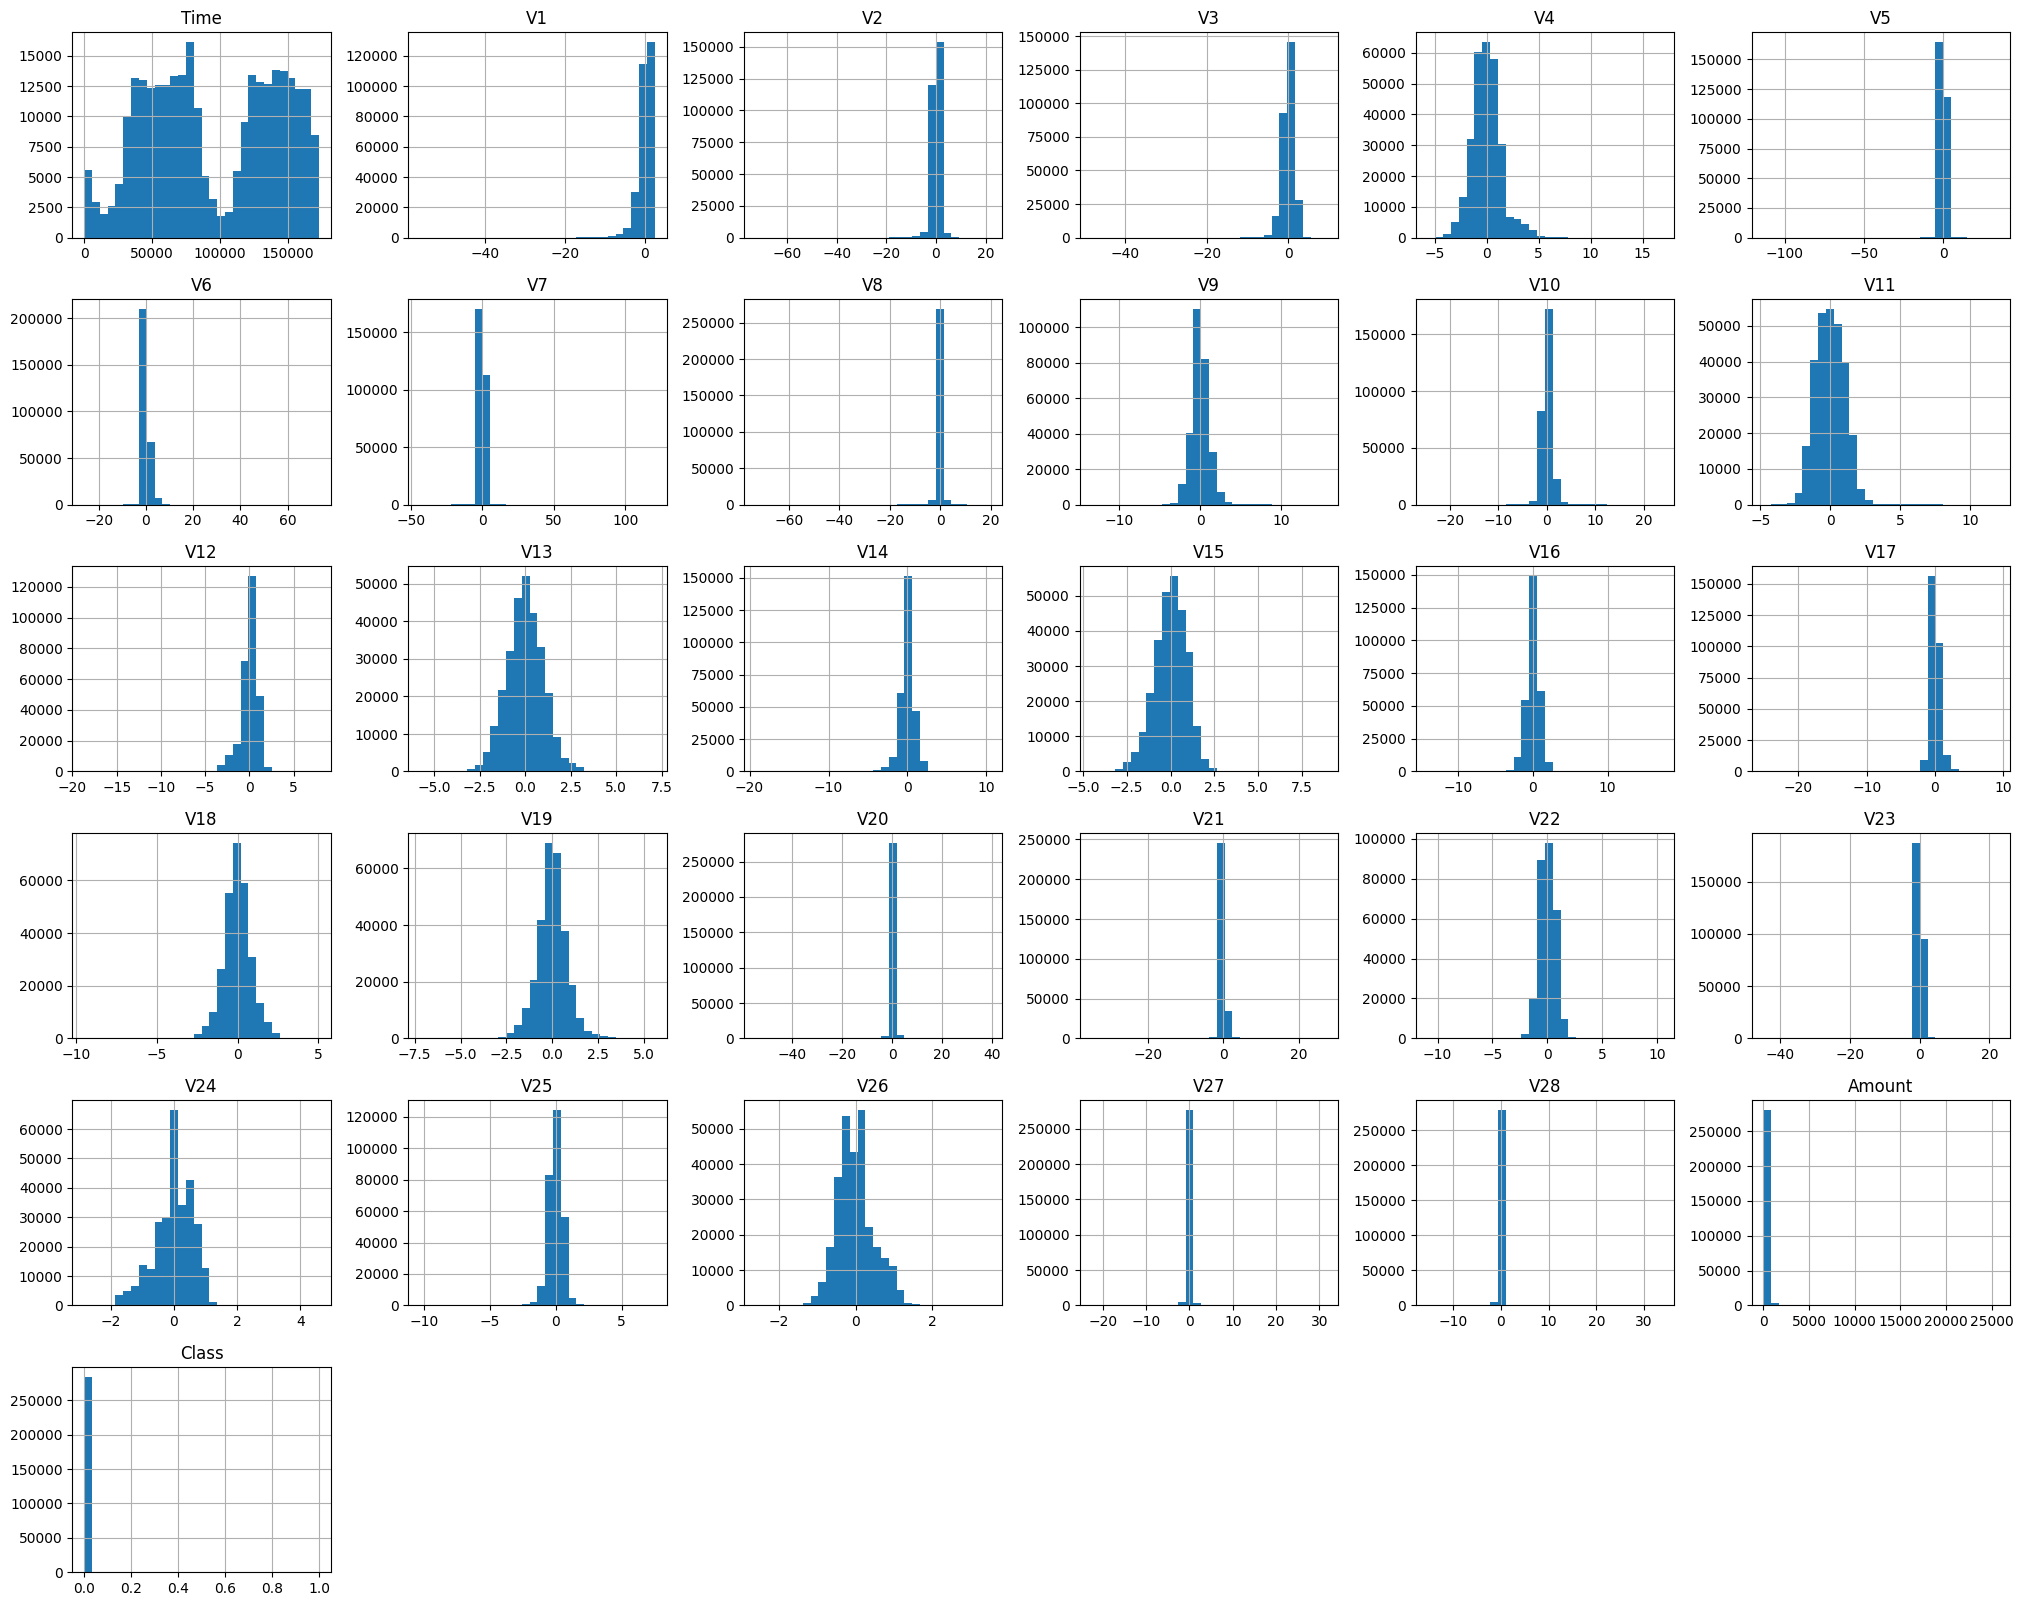

In [10]:
df.hist(bins=30, figsize=(25,20))

In [11]:
# Checking how much data is imbalanced
ratio = df['Class'].value_counts().values
print(f"Non-Fraud Count:\t%d" % ratio[0])
print(f"Fraud Count:\t\t%d" % ratio[1])
print(f"\n[Imbalanced Ratio: %.3f %%]" % (ratio[0]/(ratio[0]+ratio[1])))

Non-Fraud Count:	284315
Fraud Count:		492

[Imbalanced Ratio: 0.998 %]


In [12]:
# import seaborn as sns
# f, ax = plt.subplots(figsize=(25,20))
# sns.heatmap(df, annot=True, linewidth=0.3, fmt="0.2f", ax=ax, cmap="coolwarm")

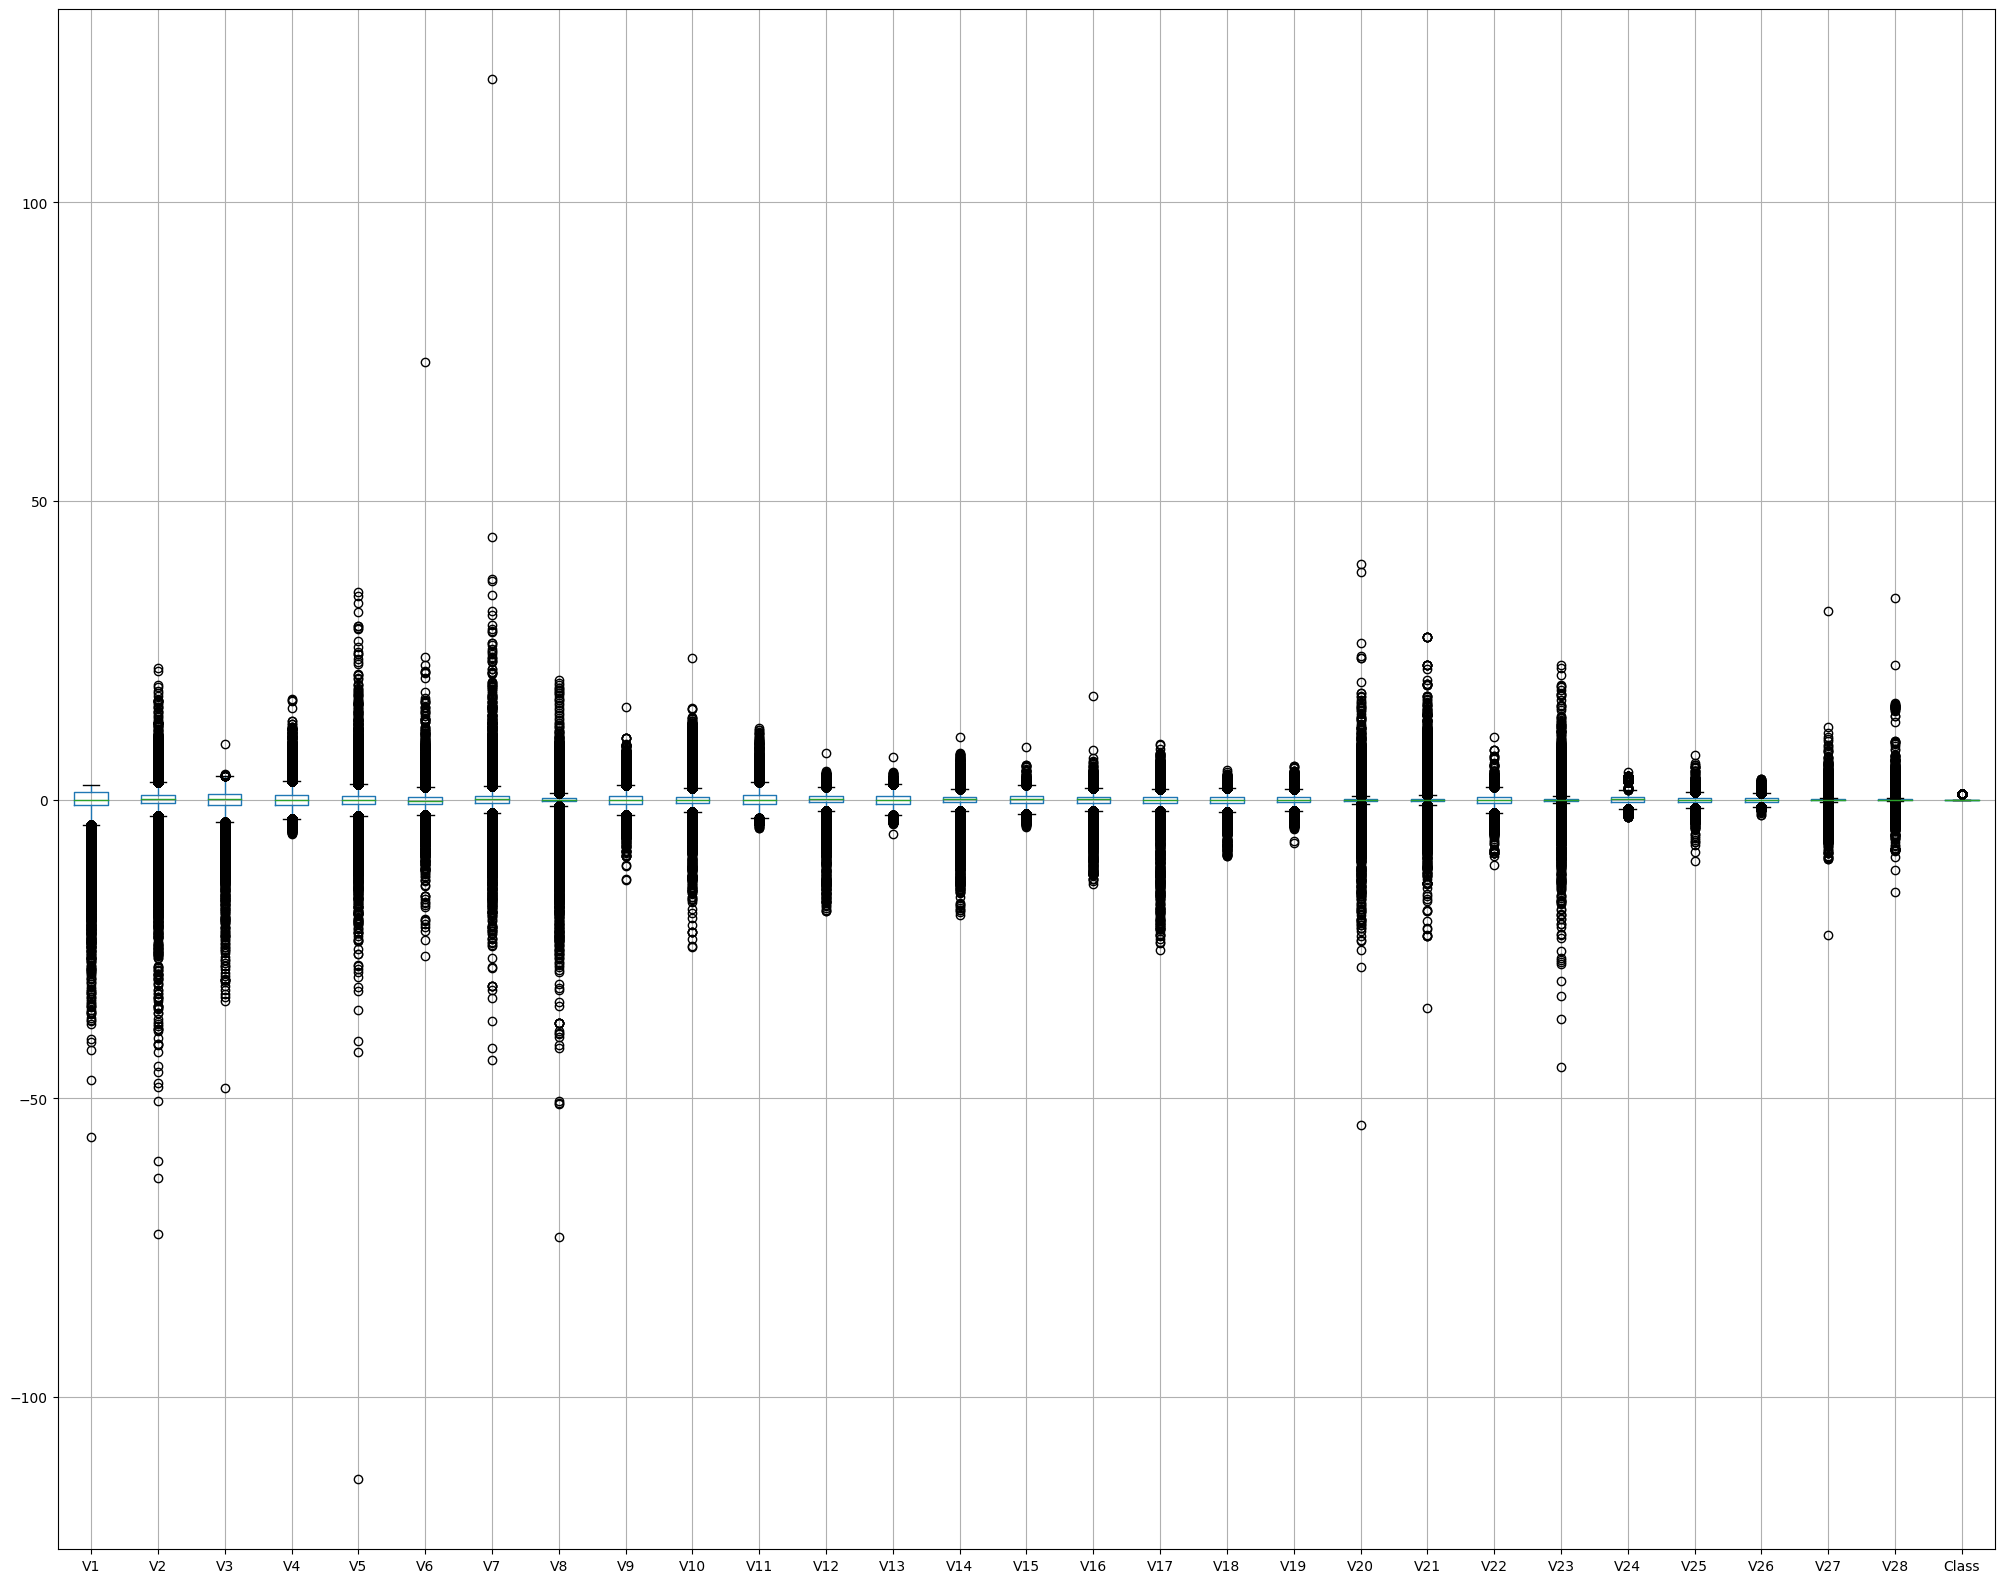

In [13]:
df.boxplot(column=["V1", "V2", "V3", "V4",
                "V5", "V6", "V7", "V8", "V9", "V10", "V11",
                "V12", "V13", "V14", "V15", "V16", "V17", "V18",
                "V19", "V20", "V21", "V22", "V23", "V24", "V25",
                "V26", "V27", "V28","Class"],figsize=(25,20))
plt.show()

# **3.0 - Preprocessing**

In [14]:
original = df.copy()

In [15]:
df = original

## **3.1 - Feature Selection**

In [16]:
# Normalizing Time Series Data causes Problems
df = df.drop('Time', axis=1)

## **3.2 - Train Test Split**

In [17]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, random_state=42, test_size=0.3, stratify=df[['Class']])

train_x, train_y = train.drop('Class', axis=1), train['Class']
test_x, test_y = test.drop('Class', axis=1), test['Class']

train_x.reset_index(drop=True, inplace=True)
test_x.reset_index(drop=True, inplace=True)

train_y.reset_index(drop=True, inplace=True)
test_y.reset_index(drop=True, inplace=True)

In [18]:
# Show Data Split Count and Ratio
trainCount = train['Class'].value_counts().values
testCount = train['Class'].value_counts().values

# Count
print("Train -",train['Class'].value_counts())
print("\nTest -",test['Class'].value_counts())

# Ratio
print(f"\n[Train Ratio: %.3f]" % (testCount[0]/(testCount[0]+testCount[1])))
print(f"[Test Ratio: %.3f]" % (trainCount[0]/(trainCount[0]+trainCount[1])))

Train - Class
0.0    199020
1.0       344
Name: count, dtype: int64

Test - Class
0.0    85295
1.0      148
Name: count, dtype: int64

[Train Ratio: 0.998]
[Test Ratio: 0.998]


## **3.3 - Data Scaling**

In [19]:
train_x['Amount'] = np.log1p(train_x.pop('Amount'))
test_x['Amount'] = np.log1p(test_x.pop('Amount'))

In [20]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

trainScaled = scaler.fit_transform(train_x)
testScaled = scaler.transform(test_x)

train_x = pd.DataFrame(trainScaled)
test_x = pd.DataFrame(testScaled)

In [21]:
train_x.describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,...,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000
mean,0.958324,0.767237,0.837391,0.251944,0.765718,0.263023,0.265354,0.785372,0.462849,0.508730,...,0.580255,0.561487,0.510048,0.669870,0.382227,0.629029,0.425460,0.416504,0.313134,0.310622
std,0.033398,0.017495,0.026336,0.062802,0.009339,0.013438,0.007605,0.012858,0.037847,0.022562,...,0.008269,0.011933,0.033875,0.009345,0.081535,0.031863,0.078766,0.007526,0.006691,0.163095
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.942722,0.760923,0.821976,0.214388,0.761058,0.255290,0.261982,0.783149,0.440715,0.497655,...,0.578010,0.557797,0.484744,0.667437,0.334413,0.609691,0.372060,0.415206,0.312050,0.186885
50%,0.958641,0.767940,0.840539,0.251008,0.765347,0.260266,0.265602,0.785632,0.461051,0.506795,...,0.579598,0.561010,0.510336,0.669701,0.387776,0.630061,0.416944,0.416536,0.313352,0.308796
75%,0.980692,0.775752,0.855193,0.284904,0.769831,0.267030,0.268834,0.788893,0.483454,0.518147,...,0.581681,0.564487,0.534697,0.672071,0.441413,0.650456,0.464804,0.418192,0.314712,0.429695
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **4.0 - Training Models**

## **4.1 - Neural Network Model**

In [22]:
# Deep Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

deepNN = Sequential()
deepNN.add(InputLayer((train_x.shape[1],)))
deepNN.add(Dense(16,'relu'))
deepNN.add(BatchNormalization())
deepNN.add(Dropout(0.3))
deepNN.add(Dense(16,'relu'))
deepNN.add(BatchNormalization())
deepNN.add(Dropout(0.3))
deepNN.add(Dense(8,'relu'))
deepNN.add(BatchNormalization())
deepNN.add(Dropout(0.3))
deepNN.add(Dense(8,'relu'))
deepNN.add(BatchNormalization())
deepNN.add(Dropout(0.3))
deepNN.add(Dense(1, 'sigmoid'))

deepNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,161 (4.54 KB)

 Trainable params: 1,065 (4.16 KB)

 Non-trainable params: 96 (384.00 B)

In [23]:
opt = tf.keras.optimizers.AdamW(learning_rate=0.001)
deepNN.compile(optimizer=opt, loss='binary_crossentropy', metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.F1Score(threshold=0.5)])
historyNN = deepNN.fit(train_x,train_y, epochs=100, batch_size=128)

Epoch 1/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - binary_accuracy: 0.8580 - f1_score: 0.0042 - loss: 0.3687
Epoch 2/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - binary_accuracy: 0.9981 - f1_score: 0.0565 - loss: 0.0166
Epoch 3/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - binary_accuracy: 0.9983 - f1_score: 0.2494 - loss: 0.0105
Epoch 4/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - binary_accuracy: 0.9984 - f1_score: 0.3665 - loss: 0.0083
Epoch 5/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - binary_accuracy: 0.9987 - f1_score: 0.4916 - loss: 0.0071
Epoch 6/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - binary_accuracy: 0.9988 - f1_score: 0.5145 - loss: 0.0065
Epoch 7/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - binary_accuracy: 0.9990 - f1_score: 0.6154 - loss: 0.0052
Epoch 8/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - binary_accuracy: 0.9991 - f1_score: 0.6948 - loss: 0.0050
Epoch 9/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - binary_accuracy: 0.99

## **4.2 - Weighted Neural Network Model**

In [24]:
# Balanced Deep Neural Network Model
from sklearn.utils import class_weight

cw = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(train_y), y=train_y)
cw = dict(enumerate(cw))

wdeepNN = Sequential()
wdeepNN.add(InputLayer((train_x.shape[1],)))
wdeepNN.add(Dense(16,'relu'))
wdeepNN.add(BatchNormalization())
wdeepNN.add(Dropout(0.3))
wdeepNN.add(Dense(16,'relu'))
wdeepNN.add(BatchNormalization())
wdeepNN.add(Dropout(0.3))
wdeepNN.add(Dense(8,'relu'))
wdeepNN.add(BatchNormalization())
wdeepNN.add(Dropout(0.3))
wdeepNN.add(Dense(8,'relu'))
wdeepNN.add(BatchNormalization())
wdeepNN.add(Dropout(0.3))
wdeepNN.add(Dense(1, 'sigmoid'))

deepNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,293 (12.87 KB)

 Trainable params: 1,065 (4.16 KB)

 Non-trainable params: 96 (384.00 B)

 Optimizer params: 2,132 (8.33 KB)

In [25]:
opt = tf.keras.optimizers.AdamW(learning_rate=0.001)
wdeepNN.compile(optimizer=opt, loss='binary_crossentropy', metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.F1Score(threshold=0.5)])
historyWNN = wdeepNN.fit(train_x,train_y, epochs=100, batch_size=128, class_weight=cw)

Epoch 1/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - binary_accuracy: 0.4358 - f1_score: 0.0040 - loss: 1.0968
Epoch 2/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - binary_accuracy: 0.7748 - f1_score: 0.0113 - loss: 0.4576
Epoch 3/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - binary_accuracy: 0.8805 - f1_score: 0.0250 - loss: 0.3717
Epoch 4/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - binary_accuracy: 0.9159 - f1_score: 0.0336 - loss: 0.3068
Epoch 5/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - binary_accuracy: 0.9354 - f1_score: 0.0469 - loss: 0.2249
Epoch 6/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - binary_accuracy: 0.9443 - f1_score: 0.0485 - loss: 0.2330
Epoch 7/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - binary_accuracy: 0.9396 - f1_score: 0.0481 - loss: 0.2295
Epoch 8/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - binary_accuracy: 0.9435 - f1_score: 0.0512 - loss: 0.2192
Epoch 9/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - binary_accuracy: 0.94

## **4.3 - XGBoost Model**

In [26]:
import xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(train_x, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

## **4.4 - Logistic Regression Model**

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression
logistic = LogisticRegression()
logistic.fit(train_x, train_y)

LogisticRegression()

## **4.5 - SVC Model**

In [28]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(train_x, train_y)

SVC(probability=True)

## **4.6 - Voting Model (Deep NN, XGBoost, SVC, and Logistic Regression)**

In [29]:
# Voting Model
from sklearn.ensemble import VotingClassifier
from scikeras.wrappers import KerasClassifier

def deep_nn():
  model = Sequential()
  model.add(InputLayer((train_x.shape[1],)))
  model.add(Dense(16,'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(16,'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(8,'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(8,'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(1, 'sigmoid'))


  opt = tf.keras.optimizers.AdamW(learning_rate=0.001)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.F1Score(threshold=0.5)])

  return model

deepNNClass = KerasClassifier(build_fn=deep_nn, epochs=100, batch_size=128)


votingModel = VotingClassifier(estimators=[('Deep NN', deepNNClass),('SVC', svc), ('XGBoost', xgb)], voting='soft', weights=(2,4,5))
votingModel.fit(train_x, train_y)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - binary_accuracy: 0.8343 - f1_score: 0.0033 - loss: 0.3693
Epoch 2/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - binary_accuracy: 0.9981 - f1_score: 0.0168 - loss: 0.0173
Epoch 3/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - binary_accuracy: 0.9984 - f1_score: 0.2630 - loss: 0.0105
Epoch 4/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - binary_accuracy: 0.9986 - f1_score: 0.4863 - loss: 0.0082
Epoch 5/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - binary_accuracy: 0.9989 - f1_score: 0.5657 - loss: 0.0070
Epoch 6/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - binary_accuracy: 0.9990 - f1_score: 0.6375 - loss: 0.0059
Epoch 7/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - binary_accuracy: 0.9990 - f1_score: 0.6554 - loss: 0.0050
Epoch 8/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - binary_accuracy: 0.9991 - f1_score: 0.6780 - loss: 0.0047
Epoch 9/100
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - binary_accuracy: 0.9

VotingClassifier(estimators=[('Deep NN',
                              KerasClassifier(batch_size=128, build_fn=<function deep_nn at 0x7bd966c852d0>, epochs=100)),
                             ('SVC', SVC(probability=True)),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft', weights=(2, 4, 5))

# **5.0 - Evaluation Metrics**

## **5.1 - Neural Network**

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


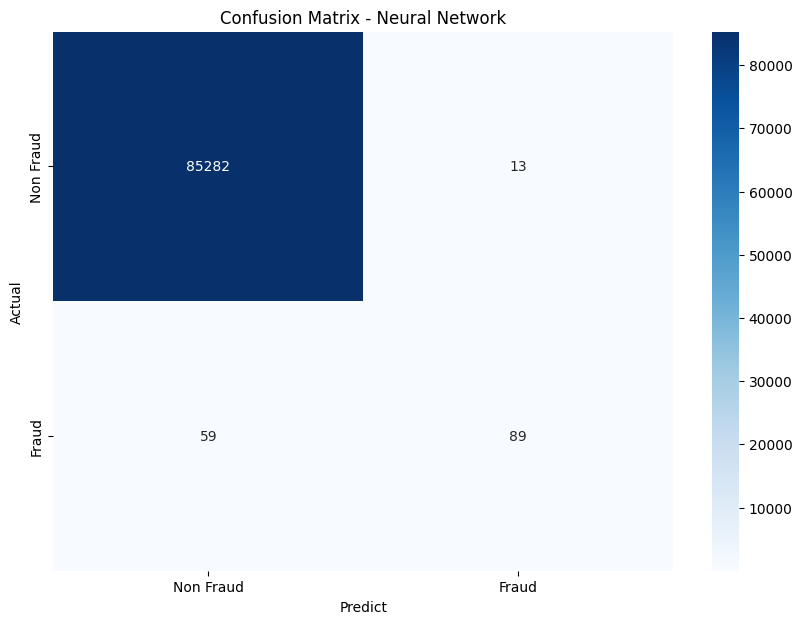

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predict_y_NN = deepNN.predict(test_x)
cm = confusion_matrix(test_y,predict_y_NN.round())

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Fraud', 'Fraud'], yticklabels=['Non Fraud', 'Fraud'])
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network')
plt.show()

In [31]:
# Classification Report
print(classification_report(test_y,predict_y_NN.round(), target_names=['Non Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00     85295
       Fraud       0.87      0.60      0.71       148

    accuracy                           1.00     85443
   macro avg       0.94      0.80      0.86     85443
weighted avg       1.00      1.00      1.00     85443



## **5.2 - Weighted Neural Network**

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


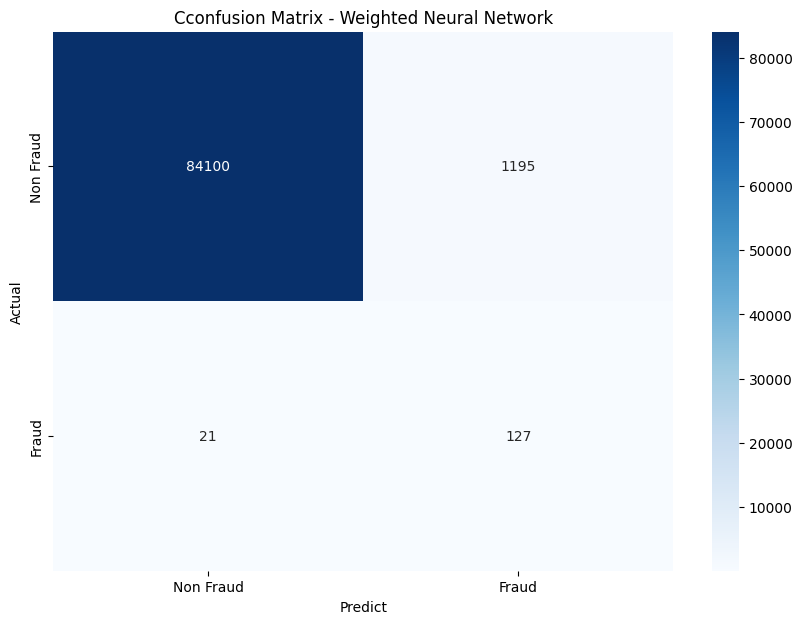

In [32]:
predict_y_WNN = wdeepNN.predict(test_x)
cm = confusion_matrix(test_y,predict_y_WNN.round())

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Fraud', 'Fraud'], yticklabels=['Non Fraud', 'Fraud'])
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Cconfusion Matrix - Weighted Neural Network')
plt.show()

In [33]:
# Classification Report
print(classification_report(test_y,predict_y_WNN.round(), target_names=['Non Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Non Fraud       1.00      0.99      0.99     85295
       Fraud       0.10      0.86      0.17       148

    accuracy                           0.99     85443
   macro avg       0.55      0.92      0.58     85443
weighted avg       1.00      0.99      0.99     85443



## **5.3 - XGBoost Model**

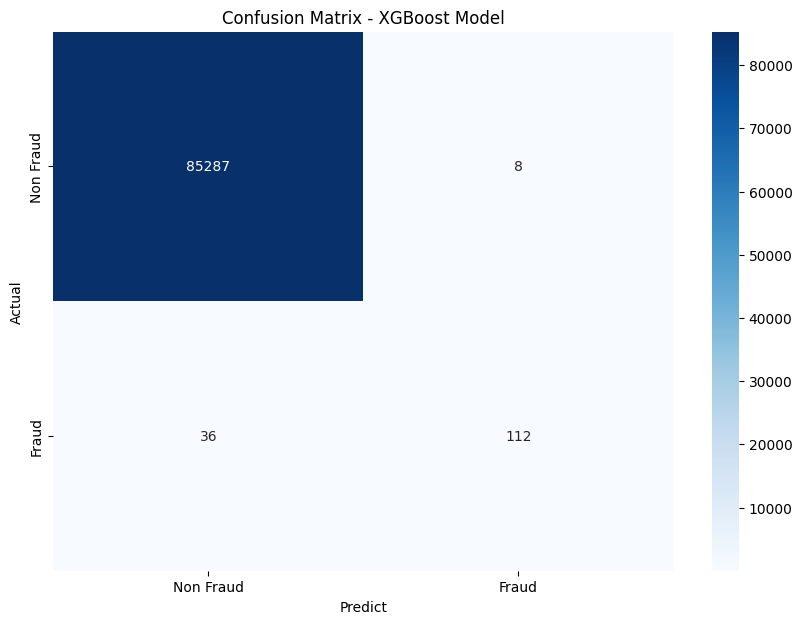

In [34]:
# XGBOOST
predict_y_XGB = xgb.predict(test_x)
cm = confusion_matrix(test_y,predict_y_XGB.round())

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Fraud', 'Fraud'], yticklabels=['Non Fraud', 'Fraud'])
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost Model')
plt.show()

In [35]:
# Classification Report
print(classification_report(test_y,predict_y_XGB.round(), target_names=['Non Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00     85295
       Fraud       0.93      0.76      0.84       148

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



## **5.4 - Logistic Regression Model**

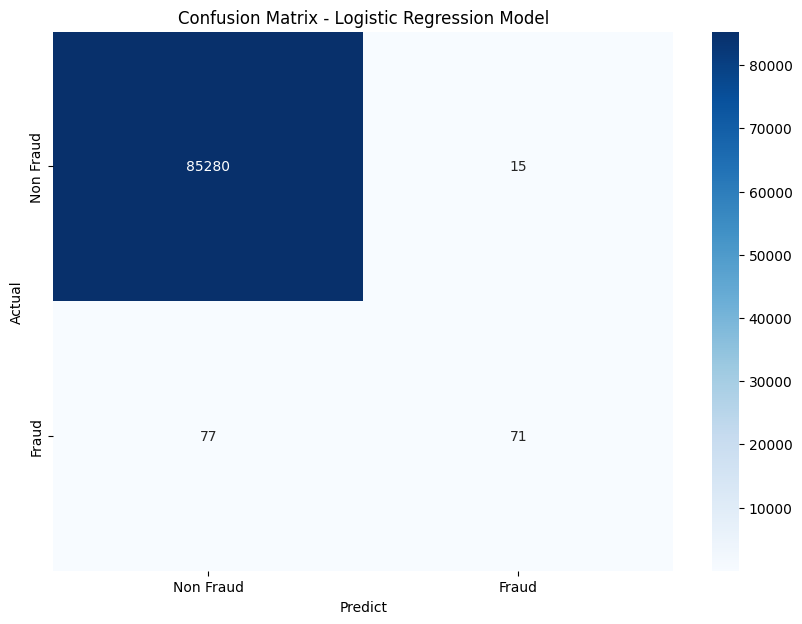

In [36]:
# Logistic
predict_y_LR = logistic.predict(test_x)
cm = confusion_matrix(test_y,predict_y_LR.round())

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Fraud', 'Fraud'], yticklabels=['Non Fraud', 'Fraud'])
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()

In [37]:
# Classification Report
print(classification_report(test_y,predict_y_LR.round(), target_names=['Non Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00     85295
       Fraud       0.83      0.48      0.61       148

    accuracy                           1.00     85443
   macro avg       0.91      0.74      0.80     85443
weighted avg       1.00      1.00      1.00     85443



## **5.5 - SVC Model**

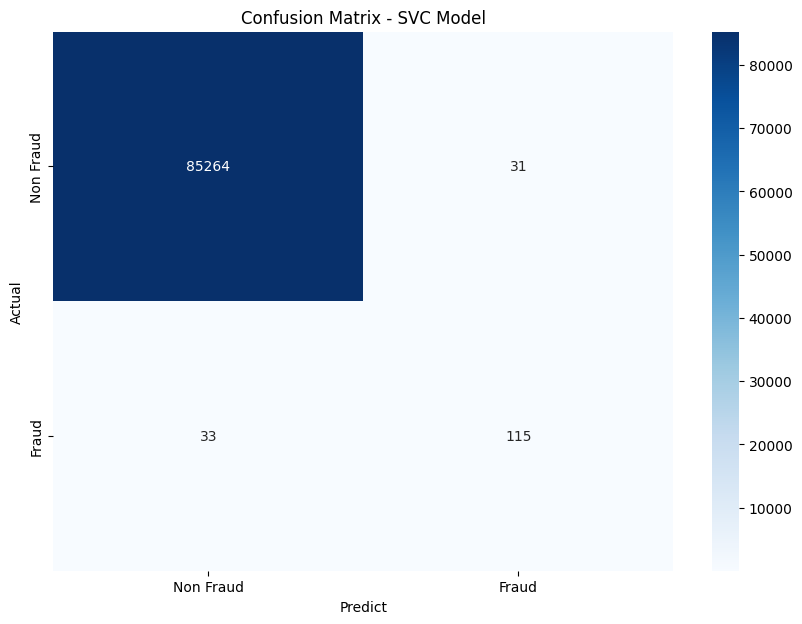

In [38]:
predict_y_svc = svc.predict(test_x)
cm = confusion_matrix(test_y,predict_y_svc.round())

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Fraud', 'Fraud'], yticklabels=['Non Fraud', 'Fraud'])
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVC Model')
plt.show()

In [39]:
# Classification Report
print(classification_report(test_y,predict_y_svc.round(), target_names=['Non Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00     85295
       Fraud       0.79      0.78      0.78       148

    accuracy                           1.00     85443
   macro avg       0.89      0.89      0.89     85443
weighted avg       1.00      1.00      1.00     85443



## **5.6 - Voting Model**

668/668 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


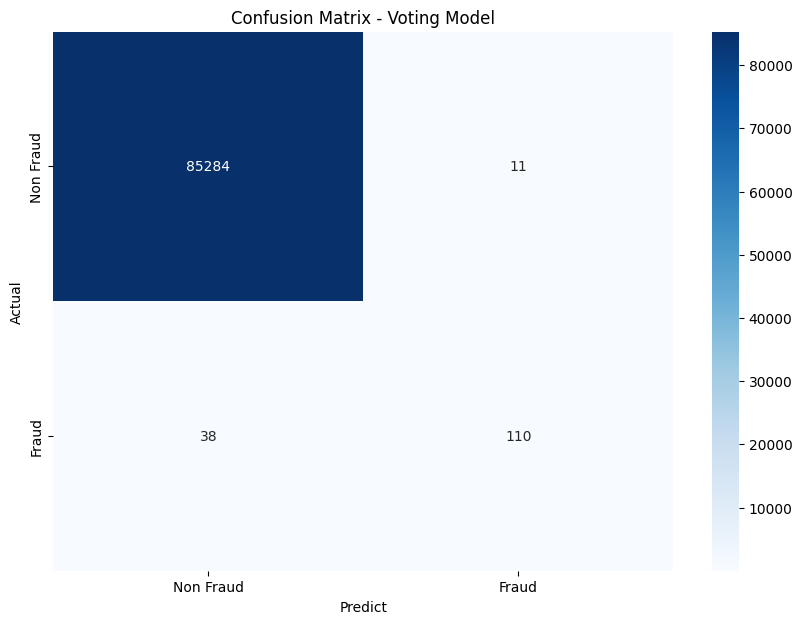

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predict_y_V = votingModel.predict(test_x)
cm = confusion_matrix(test_y,predict_y_V.round())

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Fraud', 'Fraud'], yticklabels=['Non Fraud', 'Fraud'])
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Voting Model')
plt.show()

In [41]:
# Classification Report
print(classification_report(test_y,predict_y_V.round(), target_names=['Non Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00     85295
       Fraud       0.91      0.74      0.82       148

    accuracy                           1.00     85443
   macro avg       0.95      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443



668/668 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


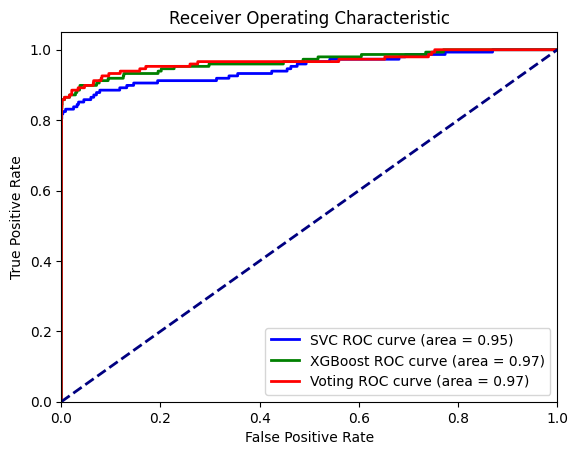

In [47]:
from sklearn.metrics import roc_curve, auc

# y_score_nn = deepNN.predict_proba(test_x)[:,1]
# y_score_wnn = deepWNN.predict_proba(test_x)[:,1]
y_score_XGB = xgb.predict_proba(test_x)[:,1]
y_score_logistic = logistic.predict_proba(test_x)[:,1]
y_score_svc = svc.predict_proba(test_x)[:,1]
y_score_voting = votingModel.predict_proba(test_x)[:,1]

# fpr_nn, tpr_nn, _ = roc_curve(test_y, y_score_nn)
# fpr_wnn, tpr_wnn, _ = roc_curve(test_y, y_score_wnn)
fpr_xgb, tpr_xgb, _ = roc_curve(test_y, y_score_XGB)
fpr_logistic, tpr_logistic, _ = roc_curve(test_y, y_score_logistic)
fpr_svc, tpr_svc, _ = roc_curve(test_y, y_score_svc)
fpr_voting, tpr_voting, _ = roc_curve(test_y, y_score_voting)


# roc_auc_nn = auc(fpr_nn, tpr_nn)
# roc_auc_wnn = auc(fpr_wnn, tpr_wnn)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
roc_auc_svc = auc(fpr_svc, tpr_svc)
roc_auc_voting = auc(fpr_voting, tpr_voting)


plt.figure()
# plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=2, label='NN ROC curve (area = %0.2f)' % roc_auc_nn)
plt.plot(fpr_svc, tpr_svc, color='blue', lw=2, label='SVC ROC curve (area = %0.2f)' % roc_auc_svc)
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label='XGBoost ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_voting, tpr_voting, color='red', lw=2, label='Voting ROC curve (area = %0.2f)' % roc_auc_voting)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()